In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
array_weights = np.load("results/avg/15d/0.0005/seed852/weights_sorted.npy")

In [26]:
df_train = pd.DataFrame(np.loadtxt("data/train_90_ID.txt"))
df_train.columns = ["anchor", "positive", "negative", "ID"]
new_order = ["ID", "anchor", "positive", "negative"]
df_train = df_train[new_order]

In [27]:
df_train.head()

,ID,anchor,positive,negative
0,0.0,460.0,952.0,469.0
1,0.0,53.0,1414.0,216.0
2,0.0,824.0,34.0,482.0
3,0.0,1805.0,87.0,1159.0
4,0.0,297.0,903.0,1018.0


In [110]:
df_1 = df_train.query("ID == 3.0").copy()

In [111]:
df_1.shape

(2192, 4)

In [112]:
def min_difference(row):
    triplet = [array_weights[int(i), :] for i in list(row[["anchor", "positive", "negative"]])]
    pos_sim = np.sum(triplet[0] * triplet[1])
    neg_sim = np.sum(triplet[0] * triplet[2])
    neg_sim_2 = np.sum(triplet[1] * triplet[2])
    smallest_diff = pos_sim - np.max([neg_sim, neg_sim_2])
    return smallest_diff

In [113]:
df_1["smallest_difference"] = df_1[["anchor", "positive", "negative"]].apply(min_difference, axis=1)

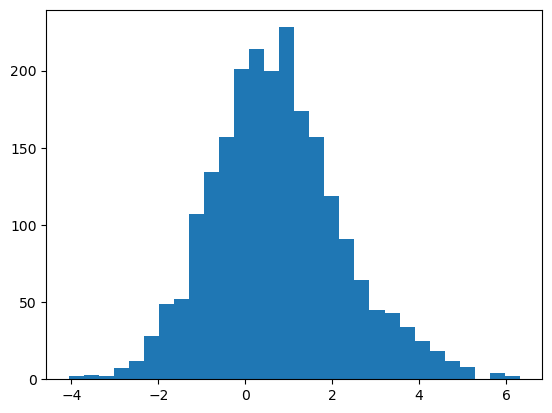

In [114]:
_ = plt.hist(df_1["smallest_difference"], bins=30)

In [115]:
df_1.sort_values("smallest_difference", inplace=True)
df_1["cum"] = np.arange(0, df_1.shape[0])
df_1["cum"] = df_1["cum"] / df_1.shape[0]
df_1

,ID,anchor,positive,negative,smallest_difference,cum
4983,3.0,601.0,485.0,1140.0,-4.056118,0.000000
3996,3.0,1045.0,1460.0,1850.0,-3.722368,0.000456
5894,3.0,46.0,1638.0,88.0,-3.678394,0.000912
4990,3.0,1479.0,809.0,764.0,-3.569621,0.001369
5397,3.0,1665.0,1520.0,548.0,-3.536870,0.001825
...,...,...,...,...,...,...
4818,3.0,469.0,346.0,644.0,5.649981,0.997719
4876,3.0,107.0,1091.0,1445.0,5.668139,0.998175
5629,3.0,964.0,1018.0,317.0,5.686295,0.998631
4335,3.0,1018.0,332.0,787.0,6.087033,0.999088


In [131]:
vector1 = np.array([2, 2])
vector2 = np.array([2, 2])
cosine_similarity = np.dot(vector1, vector2)
pos_sim = np.sum(vector1 * vector2)

In [132]:
cosine_similarity

8

In [133]:
pos_sim

8

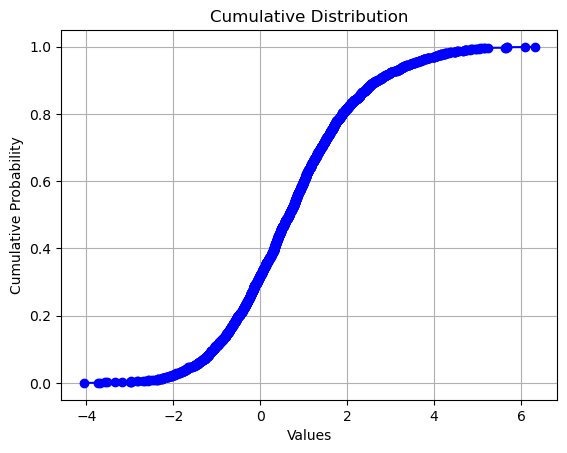

In [116]:
plt.plot(df_1['smallest_difference'], df_1['cum'], marker='o', linestyle='-', color='b')
plt.title('Cumulative Distribution')
plt.xlabel('Values')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()